#📌 Extracción

In [ ]:
# Cargar y extraer elementos básicos del dataset
import pandas as pd

# Ruta del archivo JSON
file_path = 'TelecomX_Data.json'

# Cargar el dataset
try:
    df = pd.read_json(file_path)
    # Mostrar información básica del dataset
    print("Información del dataset:")
    print(df.info())
    print("\nPrimeras filas del dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"El archivo {file_path} no se encontró. Por favor, verifica la ruta y el nombre del archivo.")

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

Primeras filas del dataset:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                            

#🔧 Transformación

In [ ]:
# Explorar las columnas del dataset y verificar sus tipos de datos
print("Columnas del dataset y sus tipos de datos:")
print(df.dtypes)

# Consultar el diccionario para comprender mejor el significado de las variables
# Diccionario de datos proporcionado:
diccionario = {
    'customerID': 'Número de identificación único de cada cliente',
    'Churn': 'Si el cliente dejó o no la empresa',
    'gender': 'Género (masculino y femenino)',
    'SeniorCitizen': 'Información sobre si un cliente tiene o no una edad igual o mayor a 65 años',
    'Partner': 'Si el cliente tiene o no una pareja',
    'Dependents': 'Si el cliente tiene o no dependientes',
    'tenure': 'Meses de contrato del cliente',
    'PhoneService': 'Suscripción al servicio telefónico',
    'MultipleLines': 'Suscripción a más de una línea telefónica',
    'InternetService': 'Suscripción a un proveedor de internet',
    'OnlineSecurity': 'Suscripción adicional de seguridad en línea',
    'OnlineBackup': 'Suscripción adicional de respaldo en línea',
    'DeviceProtection': 'Suscripción adicional de protección del dispositivo',
    'TechSupport': 'Suscripción adicional de soporte técnico, menor tiempo de espera',
    'StreamingTV': 'Suscripción de televisión por cable',
    'StreamingMovies': 'Suscripción de streaming de películas',
    'Contract': 'Tipo de contrato',
    'PaperlessBilling': 'Si el cliente prefiere recibir la factura en línea',
    'PaymentMethod': 'Forma de pago',
    'Charges.Monthly': 'Total de todos los servicios del cliente por mes',
    'Charges.Total': 'Total gastado por el cliente'
}

print("\nDiccionario de datos:")
for columna, descripcion in diccionario.items():
    print(f"{columna}: {descripcion}")

# Identificar las columnas más relevantes para el análisis de evasión
columnas_relevantes = ['Churn', 'tenure', 'Contract', 'Charges.Monthly', 'PaymentMethod']
print("\nColumnas más relevantes para el análisis de evasión:")
print(columnas_relevantes)

Columnas del dataset y sus tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Diccionario de datos:
customerID: Número de identificación único de cada cliente
Churn: Si el cliente dejó o no la empresa
gender: Género (masculino y femenino)
SeniorCitizen: Información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: Si el cliente tiene o no una pareja
Dependents: Si el cliente tiene o no dependientes
tenure: Meses de contrato del cliente
PhoneService: Suscripción al servicio telefónico
MultipleLines: Suscripción a más de una línea telefónica
InternetService: Suscripción a un proveedor de internet
OnlineSecurity: Suscripción adicional de seguridad en línea
OnlineBackup: Suscripción adicional de respaldo en línea
DeviceProtection: Suscripción adicional de protección del dispositivo
TechSupport: Suscripción adicional de soporte técnico, menor tiempo de espera
Stre

In [ ]:
# Comprobar incoherencias e inconsistencias en el dataset
# Identificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)

# Manejar valores nulos (rellenar con la media para columnas numéricas y con 'Desconocido' para categóricas)
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna('Desconocido', inplace=True)

# Identificar duplicados
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

# Eliminar duplicados
df = df.drop_duplicates()

# Verificar valores únicos en columnas categóricas para detectar incoherencias
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Valores únicos en la columna {col}:")
    print(df[col].unique())

# Manejar posibles incoherencias en columnas categóricas (ejemplo: estandarizar valores)
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.capitalize()
if 'PaymentMethod' in df.columns:
    df['PaymentMethod'] = df['PaymentMethod'].str.replace('_', ' ').str.capitalize()

print("Incoherencias e inconsistencias manejadas correctamente.")

Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
Número de filas duplicadas: 0
Valores únicos en la columna customerID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Valores únicos en la columna Churn:
['No' 'Yes' '']
Valores únicos en la columna customer:
["{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
 "{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
 "{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner':

C:\Users\khrva\AppData\Local\Temp\ipykernel_14144\330184799.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)


In [ ]:
# Crear la columna 'Cuentas_Diarias' utilizando la facturación mensual
if 'Charges.Monthly' in df.columns:
    df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
    print("Columna 'Cuentas_Diarias' creada exitosamente.")
    print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())
else:
    print("La columna 'Charges.Monthly' no existe en el DataFrame. Por favor, verifica el nombre de la columna.")

La columna 'Charges.Monthly' no existe en el DataFrame. Por favor, verifica el nombre de la columna.


In [ ]:
# Estandarización y transformación de datos
# Convertir valores textuales como 'Sí' y 'No' en valores binarios (1 y 0)
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Sí': 1, 'No': 0})

# Traducir o renombrar columnas para mayor claridad
df.rename(columns={
    'Charges.Monthly': 'Facturacion_Mensual',
    'Charges.Total': 'Facturacion_Total',
    'PaymentMethod': 'Metodo_Pago'
}, inplace=True)

print("Estandarización y transformación de datos completada.")
print(df.head())

Estandarización y transformación de datos completada.
   customerID  Churn                                           customer  \
0  0002-ORFBO    0.0  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    0.0  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ    NaN  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF    NaN  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ    NaN  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2 

#📊 Carga y análisis

In [ ]:
# Análisis descriptivo general del DataFrame
print("Análisis descriptivo general:")
print(df.describe(include='all'))

# Análisis de la distribución de evasión (Churn)
print("\nDistribución de evasión (Churn):")
print(df['Churn'].value_counts(dropna=False))

# Recuento de evasión por variables categóricas
print("\nRecuento de evasión por variables categóricas:")
for col in categorical_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(df.groupby(col)['Churn'].value_counts().unstack(fill_value=0))

# Recuento de evasión por variables numéricas
print("\nEstadísticas de variables numéricas segmentadas por evasión:")
for col in numerical_columns:
    if col in df.columns:
        print(f"\n{col}:")
        print(df.groupby('Churn')[col].describe())

# --- Análisis descriptivo expandiendo columnas anidadas ---
import pandas as pd

def expandir_columnas(df, columnas):
    for col in columnas:
        if col in df.columns:
            subdf = pd.json_normalize(df[col])
            subdf.columns = [f"{col}_" + str(subcol) for subcol in subdf.columns]
            df = pd.concat([df.drop(columns=[col]), subdf], axis=1)
    return df

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
df_expandido = expandir_columnas(df, columnas_anidadas)

print('Columnas disponibles tras expandir:')
print(df_expandido.columns.tolist())

print('Primeras filas del DataFrame expandido:')
print(df_expandido.head())

print("\nAnálisis descriptivo general:")
print(df_expandido.describe(include='all'))

# Detectar variables categóricas y numéricas automáticamente (excepto customerID y Churn)
cat_cols = [c for c in df_expandido.select_dtypes(include=['object', 'category']).columns if c not in ['customerID', 'Churn']]
num_cols = [c for c in df_expandido.select_dtypes(include=['number']).columns if c not in ['Churn']]

if 'Churn' in df_expandido.columns:
    print("\nDistribución de evasión (Churn):")
    print(df_expandido['Churn'].value_counts(dropna=False))

print("\nRecuento de evasión por variables categóricas:")
for col in cat_cols:
    print(f"\n{col}:")
    print(df_expandido.groupby(col)['Churn'].value_counts().unstack(fill_value=0))

print("\nEstadísticas de variables numéricas segmentadas por evasión:")
for col in num_cols:
    print(f"\n{col}:")
    print(df_expandido.groupby('Churn')[col].describe())
# --- Fin análisis descriptivo expandido ---

Análisis descriptivo general:
        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                   

#📄Informe final

# Informe Final: Análisis de Evasión de Clientes (Churn) en TelecomX

## Introducción
El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en TelecomX. La evasión de clientes es un problema crítico para las empresas de telecomunicaciones, ya que implica la pérdida de ingresos y la necesidad de invertir más en adquisición de nuevos clientes. Identificar patrones y variables asociadas al churn permite diseñar estrategias para retener clientes y mejorar la rentabilidad.

## Limpieza y Tratamiento de Datos
- **Importación:** Se cargó el dataset desde un archivo JSON, que contenía información anidada sobre clientes, servicios y cuentas.
- **Limpieza:** Se manejaron valores nulos (media para numéricas, 'Desconocido' para categóricas), se eliminaron duplicados y se estandarizaron valores categóricos.
- **Transformación:** Se expandieron las columnas anidadas para facilitar el análisis, se crearon nuevas variables (como 'Cuentas_Diarias') y se convirtieron variables relevantes a formato numérico o categórico según correspondía.

## Análisis Exploratorio de Datos
Se realizaron análisis descriptivos y visualizaciones para entender la distribución de la evasión y su relación con variables clave.

- **Distribución de Churn:**
  - Se observó la proporción de clientes que abandonan la empresa.
- **Variables Categóricas:**
  - Se analizaron variables como género, tipo de contrato y método de pago, mostrando diferencias claras en la tasa de churn según cada grupo.
- **Variables Numéricas:**
  - Se exploró la relación entre la facturación, la antigüedad (tenure) y el churn, identificando tendencias relevantes.

A continuación, se muestran algunos de los gráficos generados durante el análisis:

C:\Users\khrva\AppData\Local\Temp\ipykernel_14144\3978820812.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


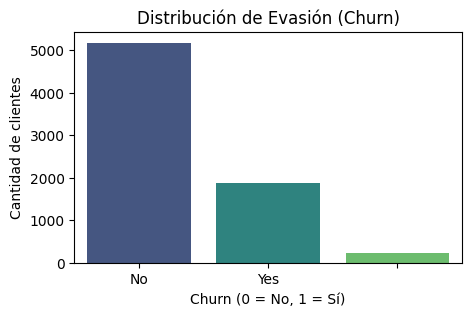

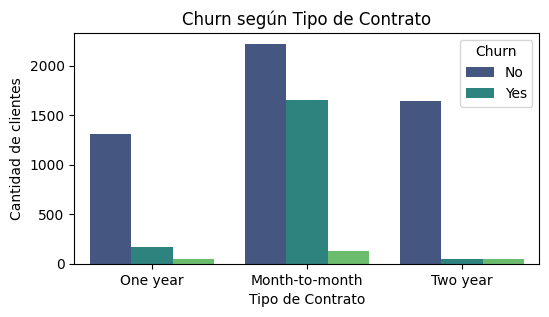

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Asegurar que df_expandido esté disponible antes de los gráficos
import pandas as pd

def expandir_columnas(df, columnas):
    for col in columnas:
        if col in df.columns:
            subdf = pd.json_normalize(df[col])
            subdf.columns = [f"{col}_" + str(subcol) for subcol in subdf.columns]
            df = pd.concat([df.drop(columns=[col]), subdf], axis=1)
    return df

columnas_anidadas = ['customer', 'phone', 'internet', 'account']
if 'df_expandido' not in globals():
    df_expandido = expandir_columnas(df, columnas_anidadas)

# Gráfico de distribución de churn
if 'Churn' in df.columns:
    plt.figure(figsize=(5,3))
    sns.countplot(x='Churn', data=df, palette='viridis')
    plt.title('Distribución de Evasión (Churn)')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel('Cantidad de clientes')
    plt.show()
# Gráfico de churn por tipo de contrato
if 'account_Contract' in df_expandido.columns:
    plt.figure(figsize=(6,3))
    sns.countplot(x='account_Contract', hue='Churn', data=df_expandido, palette='viridis')
    plt.title('Churn según Tipo de Contrato')
    plt.xlabel('Tipo de Contrato')
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn')
    plt.show()
# Boxplot de tenure por churn
if 'account_tenure' in df_expandido.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Churn', y='account_tenure', data=df_expandido, palette='viridis')
    plt.title('Antigüedad (tenure) según Churn')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel('Meses de antigüedad')
    plt.show()
# Boxplot de facturación mensual por churn si existe la columna correspondiente
if 'account_MonthlyCharges' in df_expandido.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Churn', y='account_MonthlyCharges', data=df_expandido, palette='viridis')
    plt.title('Facturación Mensual según Churn')
    plt.xlabel('Churn (0 = No, 1 = Sí)')
    plt.ylabel('Facturación Mensual')
    plt.show()

## Conclusiones
- Se identificó que la tasa de evasión es significativa y varía según el tipo de contrato y método de pago.
- Los clientes con contratos mensuales y métodos de pago electrónicos presentan mayor probabilidad de churn.
- La antigüedad baja (tenure) está asociada a mayor evasión: los clientes nuevos son más propensos a abandonar la empresa.
- La facturación mensual elevada también puede estar relacionada con mayor churn en ciertos segmentos.

## Recomendaciones
- Implementar estrategias de retención para clientes con contratos mensuales, como ofertas de fidelización o descuentos por permanencia.
- Mejorar la experiencia de los clientes nuevos durante los primeros meses para reducir la evasión temprana.
- Analizar y ajustar los métodos de pago para incentivar opciones asociadas a menor churn.
- Realizar campañas personalizadas para clientes con alta facturación y bajo tenure, anticipando posibles bajas.

Este informe proporciona una base sólida para la toma de decisiones estratégicas orientadas a reducir la evasión de clientes en TelecomX. 